In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# Importing Dataset

In [3]:
ds= pd.read_csv('breast_cancer_data.csv')
x= ds.iloc[:, [1,2,3,4,5,6,7,8,9]].values
y=ds.iloc[:,10].values
ds.keys()

Index(['index', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave points', 'symmetry', 'target'],
      dtype='object')

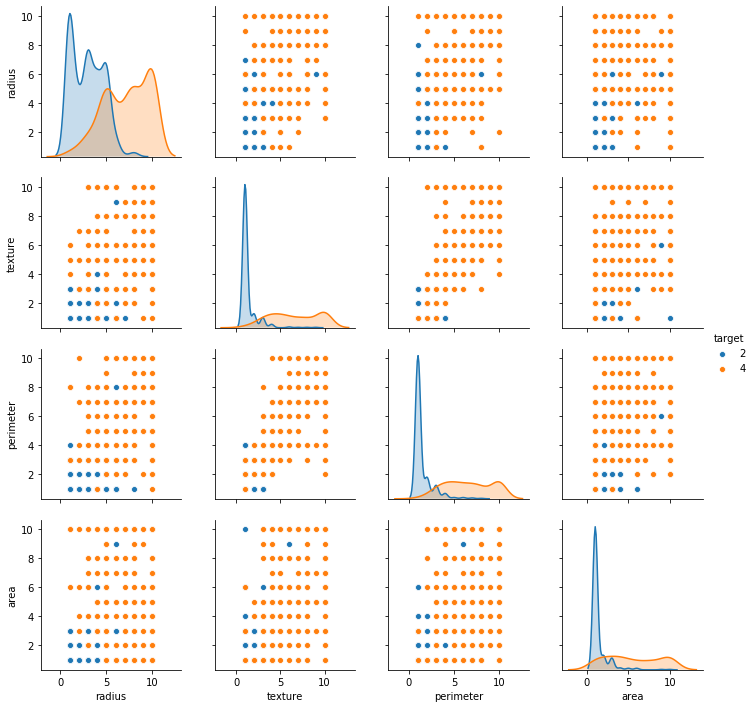

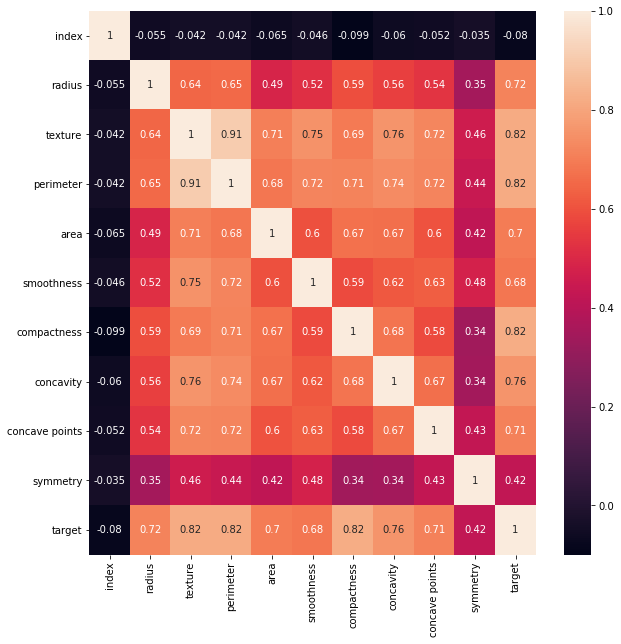

In [4]:
sns.pairplot(ds,hue="target",vars=['radius', 'texture','perimeter','area'])
#sns.countplot(y)
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(), annot= True)
#

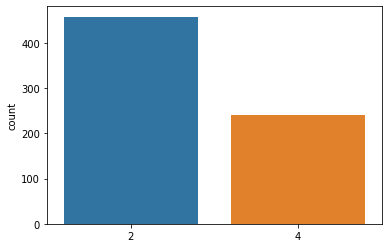

In [5]:
sns.countplot(y)

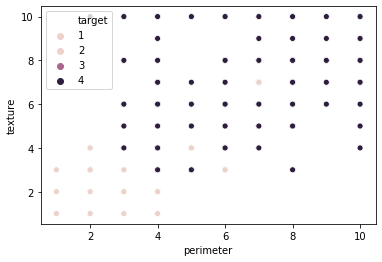

In [6]:
sns.scatterplot( hue='target',x='perimeter', y='texture', data=ds)

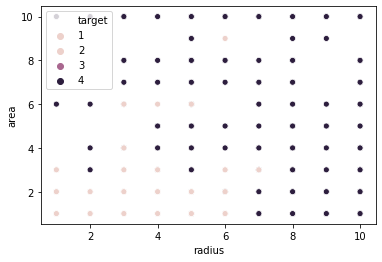

In [7]:
sns.scatterplot( hue='target',x='radius', y='area', data=ds)

# Handling missing data

In [8]:
from sklearn.preprocessing import Imputer
imputer= Imputer( missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(x[:,5:6])
x[:,5:6]=imputer.transform(x[:,5:6])

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Splitting Data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30)

# Standard Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# SVM model

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf",random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [12]:

y_pred=classifier.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
cm=  confusion_matrix (y_test,y_pred)
cr=classification_report(y_test,y_pred)


In [14]:
cr

'              precision    recall  f1-score   support\n\n           2       0.99      0.96      0.97       148\n           4       0.91      0.97      0.94        62\n\n    accuracy                           0.96       210\n   macro avg       0.95      0.96      0.96       210\nweighted avg       0.96      0.96      0.96       210\n'

In [20]:
cm

array([[142,   6],
       [  1,  61]], dtype=int64)

# Accuracy of KNN is 94% so highest accuracy is of SVM model 

In [20]:

# from sklearn.neighbors import KNeighborsClassifier
# classifier=KNeighborsClassifier(n_neighbors=5, p=2)
# classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
#cm=  confusion_matrix (y_test,y_pred)
# cr=classification_report(y_test,y_pred)



In [22]:
#cr

'              precision    recall  f1-score   support\n\n           2       0.99      0.96      0.98       148\n           4       0.91      0.98      0.95        62\n\n    accuracy                           0.97       210\n   macro avg       0.95      0.97      0.96       210\nweighted avg       0.97      0.97      0.97       210\n'